In [ ]:
# Clear the environment
rm(list = ls())

## Loading packages and data 

In [ ]:
library(readxl)
library(tidyverse)
library(readxl)
library(countrycode)


library(rnaturalearth)
library(rnaturalearthdata)
library(sf)


Attaching package: ‘rnaturalearthdata’


The following object is masked from ‘package:rnaturalearth’:

    countries110


Linking to GEOS 3.13.0, GDAL 3.8.5, PROJ 9.5.1; sf_use_s2() is TRUE


Attaching package: ‘sf’


The following object is masked from ‘package:transformr’:

    st_normalize




In [1]:
# updating file path  
comtrade_data <- "/Users/kenatuitoek/Desktop/MSc data /stats programming/UNComtrade/DataJobID-2988948_2988948_EUTradeData.csv"
carbonprice_data <- "/Users/kenatuitoek/Desktop/MSc data /stats programming/data_08_2025.xlsx"

In [4]:
# Loading Cometrade data 
cat("Loading UN Comtrade data...\n")  # processing message 
trade_data <- read_csv(comtrade_data, show_col_types = FALSE) # hide columns spaces for cleaner output

#Loading Carbon Pricing Data - sheet 4
cat("Loading Carbon Pricing data...\n")
carbon_data <- read_excel(carbonprice_data, sheet = "Compliance_Price", skip = 1) # skip the first row, row 2 has the headers 

Loading UN Comtrade data...
Loading Carbon Pricing data...


## Reshaping and cleaning carbon pricing data 

In [5]:
#View(carbon_data)

# Reshape Carbon Pricing Data from wide to long 
cat("Reshaping carbon pricing data...\n")

# Main columns that should be kept unchanged, they describe the observations
meta_cols <- c("Unique ID", "Name of the initiative","Instrument Type","Region","Income group","Metric")

# wide to long , pivot and stack into two new columns Year and Carbon Price
carbon_long <- carbon_data %>%
    pivot_longer(
        cols = -all_of(meta_cols),  #all columns except maincols
        names_to = "Year",
        values_to = "Carbon_Price"
    ) %>%
    mutate(Year = as.integer(Year)) %>%   # year values from text back to integer 
    filter(!is.na(Carbon_Price))  # Remove missing values

Reshaping carbon pricing data...


In [6]:
# Expanding ETS and Carbon Tax that covers multiple countries 
#cat("\nExtending EU ETS to show all member countries...\n")

# EU ETS countries 
eu_members <- c("AUT", "BEL", "BGR", "HRV", "CYP", "CZE", "DNK", "EST","FIN",
 "FRA", "DEU", "GRC", "HUN", "IRL", "ITA", "LVA","LTU", "LUX", "MLT", "NLD", 
 "POL", "PRT", "ROU", "SVK","SVN", "ESP", "SWE", "ISL", "LIE", "NOR")

# create seperate EU ETS data 
eu_ets <- carbon_long %>%
    filter(str_detect(`Unique ID`, "ETS_EU")) %>%
    select(Year, Carbon_Price, `Instrument Type`,`Unique ID`)

# include all EU members , creates one row for each country 
eu_extended <- crossing (
    eu_ets,
    Country_codes = eu_members)
# extends EU ETS to country year observations 
#nrow(eu_extended) # 646 observations 
View(eu_extended) # shows EU_ETS for each EU member country
 
#cat("\nExtending EU RGGI to show all member countries...\n")
# assign RGGI(north america states) to USA
rggi_fixed <- carbon_long %>%
  filter(`Unique ID` == "ETS_RGGI") %>%
  mutate(Country_IS03 = "USA")

other_schemes <- carbon_long %>%
  filter(!`Unique ID` %in% c("ETS_EU", "ETS_RGGI"))

final_carbon_data <- bind_rows(other_schemes, eu_extended)

View(final_carbon_data)

Year,Carbon_Price,Instrument Type,Unique ID,Country_codes
<int>,<dbl>,<chr>,<chr>,<chr>
2005,19.04973,ETS,ETS_EU,AUT
2005,19.04973,ETS,ETS_EU,BEL
2005,19.04973,ETS,ETS_EU,BGR
2005,19.04973,ETS,ETS_EU,CYP
2005,19.04973,ETS,ETS_EU,CZE
2005,19.04973,ETS,ETS_EU,DEU
2005,19.04973,ETS,ETS_EU,DNK
2005,19.04973,ETS,ETS_EU,ESP
2005,19.04973,ETS,ETS_EU,EST


Unique ID,Name of the initiative,Instrument Type,Region,Income group,Metric,Year,Carbon_Price,Country_codes
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>
Tax_CA_Alberta,Alberta carbon tax,Carbon tax,North America,High income,US$/tCO2e,2017,15.0262960,NA
Tax_CA_Alberta,Alberta carbon tax,Carbon tax,North America,High income,US$/tCO2e,2018,23.2666356,NA
Tax_CA_Alberta,Alberta carbon tax,Carbon tax,North America,High income,US$/tCO2e,2019,22.4938142,NA
ETS_CA_Alberta,Alberta TIER,ETS,North America,High income,US$/tCO2e,2007,13.0106688,NA
ETS_CA_Alberta,Alberta TIER,ETS,North America,High income,US$/tCO2e,2008,14.6056475,NA
ETS_CA_Alberta,Alberta TIER,ETS,North America,High income,US$/tCO2e,2009,11.8642727,NA
ETS_CA_Alberta,Alberta TIER,ETS,North America,High income,US$/tCO2e,2010,14.8883375,NA
ETS_CA_Alberta,Alberta TIER,ETS,North America,High income,US$/tCO2e,2011,15.5779416,NA
ETS_CA_Alberta,Alberta TIER,ETS,North America,High income,US$/tCO2e,2012,15.0135122,NA


In [7]:
# mapping carbon pricing schemes to country iso code - used to later merge with trade data 
final_carbon_data <- final_carbon_data %>%
     mutate(
      #extract country code from unique ID 
        Country_Code = str_extract(`Unique ID`,"(?<=_)[A-Z]{2}(?=_|$|[0-9])"), #extract after _ 2 letter code, followed by _ or last word
        # convert to ISO3 codes 
        IS03_from_code = countrycode(Country_Code, "iso2c", "iso3c", warn = FALSE), # 2letter codes to 3 letter codes 
        IS03_from_region = countrycode(Region, "country.name", "iso3c", warn = FALSE), #region column country names to 3 letter code
        IS03_from_country = countrycode(Country_codes, origin= "iso3c", destination = "iso3c", warn = FALSE),

        Country_IS03 = coalesce(Country_codes, IS03_from_region, IS03_from_code), # pick the first nonmissing value
        # manually fixing special cases 
        Country_IS03 = case_when(
          Country_Code == "UK" ~ "GBR",  # FIX: UK → GBR
         str_detect(`Unique ID`, "AU1|AU2") ~ "AUS",
         str_detect(`Region`, "Québec") ~ "CAN",
         TRUE ~ Country_IS03
        )
     )
#View(final_carbon_data)
#uk_present <- carbon_long %>% filter(Country_IS03 == "GBR")

#nrow(uk_present) 

unique(final_carbon_data$Country_IS03)

[1] "CAN" "ARG" "AUS" "AUT" "MEX" "CHN" "USA" "CHL" "COL" "DNK" "EST" "FIN"
[13] "FRA" "DEU" "ISL" "IDN" "IRL" "ISR" "JPN" "KAZ" "KOR" "LTU" "LIE" "LUX"
[25] "MAC" "NLD" "NZL" "NOR" "POL" "PRT" "SGP" "SLE" "ZAF" "ESP" "SWE" "CHE"
[37] "UKR" "GBR" "URY" "ALB" "BEL" "BGR" "CYP" "CZE" "GRC" "HRV" "HUN" "ITA"
[49] "LVA" "MLT" "ROU" "SVK" "SVN"

In [8]:
# See which instruments are missing ISO3 codes
missing_summary <- final_carbon_data %>%
  group_by(`Unique ID`, `Name of the initiative`, `Instrument Type`, ) %>%
  summarise(
    total_obs = n(),
    missing_ISO3 = sum(is.na(Country_IS03)),
    has_ISO3 = sum(!is.na(Country_IS03)),
    pct_missing = round(100 * missing_ISO3 / total_obs, 1),
    .groups = "drop"
  ) %>%
  filter(missing_ISO3 > 0) %>%  # Only show instruments with missing ISO3
  arrange(desc(total_obs))

# View results
print(missing_summary, n = 50)

# A tibble: 0 × 7
# ℹ 7 variables: Unique ID <chr>, Name of the initiative <chr>,
#   Instrument Type <chr>, total_obs <int>, missing_ISO3 <int>, has_ISO3 <int>,
#   pct_missing <dbl>


In [9]:
# Check all EU countries have ETS_EU
final_carbon_data %>%
  filter(`Unique ID` == "ETS_EU") %>%
  distinct(Country_IS03) %>%
  arrange(Country_IS03)  # Shows all 30+ EU members are accounted for

Country_IS03
<chr>
AUT
BEL
BGR
CYP
CZE
DEU
DNK
ESP
EST


In [10]:
# check what instrument types exist 
cat("\nInstrument types in data:\n")
print(unique(final_carbon_data$`Instrument Type`))


Instrument types in data:
[1] "Carbon tax" "ETS"       


In [11]:
#Indicators for carbon tax and ETS , building a country-year panel 
cat("\nCarbon Instrument Type Country-Year panel constructed\n")
carbon_instruments <- final_carbon_data %>%
    group_by(Country_IS03, Year) %>%
    summarise (   
        Has_ETS = as.integer(any(`Instrument Type`== "ETS")),
        Has_Tax = as.integer(any(`Instrument Type`== "Carbon tax")),
        Has_Carbon_Price = as.integer(n()> 0), # Has either scheme  

     #---ETS PRICE MEAN AND MAX ---
        ETS_Price_Mean = ifelse(
        any(`Instrument Type`== "ETS"),
        mean(Carbon_Price[`Instrument Type` == "ETS"], na.rm = TRUE),
        NA_real_  # ensures result stays numeric NA
        ), 
        ETS_Price_Max = ifelse(
        any(`Instrument Type`== "ETS"),
        max(Carbon_Price[`Instrument Type` == "ETS"], na.rm = TRUE),
        NA_real_ 
        ), 
    
        #---TAX PRICE MEAN AND MAX ---
        Tax_Price_Mean = ifelse(
        any(`Instrument Type`== "Carbon tax"),
        mean(Carbon_Price[`Instrument Type` == "Carbon tax"], na.rm = TRUE),
        NA_real_  
        ),  
        Tax_Price_Max = ifelse(
        any(`Instrument Type`== "Carbon tax"),
        max(Carbon_Price[`Instrument Type` == "Carbon tax"], na.rm = TRUE),
        NA_real_  
        ),
       #---Combine ETS and Tax Mean and Max ---
        All_Price_Max = max(Carbon_Price, na.rm = TRUE),
        All_Price_Mean = mean(Carbon_Price, na.rm = TRUE),

        #---count number of instruments---
        Num_ETS = sum(`Instrument Type`== "ETS"), 
        Num_Tax = sum(`Instrument Type`== "Carbon tax"),
        Total_types = n(),

        #---List all name of instrument for each year, unique so its not repeated--- 
        ETS_schemes = paste(unique(`Name of the initiative`[`Instrument Type`== "ETS"]),
        collapse = "; "), 
        Tax_schemes = paste(unique(`Name of the initiative`[`Instrument Type`== "Carbon tax"]),
        collapse = "; "), 

        .groups = "drop"  # drops groupby so its back to tibble
    ) %>%
    mutate(
        #categorical variables for binary variables created 
        Carbon_Price_Type = case_when(
            Has_ETS == 1 & Has_Tax == 1 ~ "Both",
            Has_ETS == 1 ~ "ETS only", 
            Has_Tax == 1 ~ "Tax only",
            TRUE ~ "None"
        )
    )
    
#duplicate check 
carbon_instruments %>%
  count(Country_IS03, Year) %>%
  filter(n > 1)  #empty, no duplicates 

View(carbon_instruments)
colnames(carbon_instruments)  

    


Carbon Instrument Type Country-Year panel constructed


Country_IS03,Year,n
<chr>,<int>,<int>


Country_IS03,Year,Has_ETS,Has_Tax,Has_Carbon_Price,ETS_Price_Mean,ETS_Price_Max,Tax_Price_Mean,Tax_Price_Max,All_Price_Max,All_Price_Mean,Num_ETS,Num_Tax,Total_types,ETS_schemes,Tax_schemes,Carbon_Price_Type
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>
ALB,2024,0,1,1,NA,NA,13.1113551,13.1113551,13.1113551,13.1113551,0,1,1,,Albania carbon tax,Tax only
ALB,2025,0,1,1,NA,NA,13.6919049,13.6919049,13.6919049,13.6919049,0,1,1,,Albania carbon tax,Tax only
ARG,2018,0,1,1,NA,NA,8.9143482,8.9143482,8.9143482,8.9143482,0,1,1,,Argentina carbon tax,Tax only
ARG,2019,0,1,1,NA,NA,6.1875695,6.1875695,6.1875695,6.1875695,0,1,1,,Argentina carbon tax,Tax only
ARG,2020,0,1,1,NA,NA,6.3420146,6.3420146,6.3420146,6.3420146,0,1,1,,Argentina carbon tax,Tax only
ARG,2021,0,1,1,NA,NA,5.3215994,5.3215994,5.3215994,5.3215994,0,1,1,,Argentina carbon tax,Tax only
ARG,2022,0,1,1,NA,NA,4.9956264,4.9956264,4.9956264,4.9956264,0,1,1,,Argentina carbon tax,Tax only
ARG,2023,0,1,1,NA,NA,3.2182570,3.2182570,3.2182570,3.2182570,0,1,1,,Argentina carbon tax,Tax only
ARG,2024,0,1,1,NA,NA,0.8115543,0.8115543,0.8115543,0.8115543,0,1,1,,Argentina carbon tax,Tax only


[1] "Country_IS03"      "Year"              "Has_ETS"          
 [4] "Has_Tax"           "Has_Carbon_Price"  "ETS_Price_Mean"   
 [7] "ETS_Price_Max"     "Tax_Price_Mean"    "Tax_Price_Max"    
[10] "All_Price_Max"     "All_Price_Mean"    "Num_ETS"          
[13] "Num_Tax"           "Total_types"       "ETS_schemes"      
[16] "Tax_schemes"       "Carbon_Price_Type"

## Merging Carbon Data to Trade Data 

In [14]:
# rename trade value for easier use 
trade_data <- trade_data %>%
    rename(TradeValue_USD_1000 = `TradeValue in 1000 USD`)
View(trade_data)

ERROR: [1m[33mError[39m in `rename()`:[22m
[33m![39m Can't rename columns that don't exist.
[31m✖[39m Column `TradeValue in 1000 USD` doesn't exist.


In [15]:
# Get unique ISO3 codes from each dataset
trade_iso3 <- trade_data %>% 
  select(ReporterName, ReporterISO3) %>% 
  distinct() %>%
  arrange(ReporterISO3)

carbon_iso3 <- carbon_instruments %>% 
  select(Country_IS03) %>% 
  distinct() %>%
  arrange(Country_IS03)

# Check which countries are in trade data but NOT in carbon data
missing_in_carbon <- trade_iso3 %>%
  anti_join(carbon_iso3, by = c("ReporterISO3" = "Country_IS03"))

cat("Countries in trade data but MISSING from carbon data:\n")
print(missing_in_carbon)
cat("\nCount:", nrow(missing_in_carbon), "\n\n")

# Check which countries are in carbon data but NOT in trade data
missing_in_trade <- carbon_iso3 %>%
  anti_join(trade_iso3, by = c("Country_IS03" = "ReporterISO3"))

cat("Countries in carbon data but MISSING from trade data:\n")
print(missing_in_trade)
cat("\nCount:", nrow(missing_in_trade), "\n\n")
# Check countries that WILL match (for verification)
matching_countries <- trade_iso3 %>%
  inner_join(carbon_iso3, by = c("ReporterISO3" = "Country_IS03"))

cat("Countries that WILL match:\n")
print(matching_countries)
cat("\nCount:", nrow(matching_countries), "\n\n")

# Summary statistics
cat("SUMMARY:\n")
cat("Total countries in trade data:", nrow(trade_iso3), "\n")
cat("Total countries in carbon data:", nrow(carbon_iso3), "\n")
cat("Countries that will match:", nrow(matching_countries), "\n")
cat("Countries in trade missing from carbon:", nrow(missing_in_carbon), "\n")
cat("Countries in carbon missing from trade:", nrow(missing_in_trade), "\n") 


Countries in trade data but MISSING from carbon data:
# A tibble: 2 × 2
  ReporterName ReporterISO3
  <chr>        <chr>       
1 India        IND         
2 Romania      ROM         

Count: 2 

Countries in carbon data but MISSING from trade data:
# A tibble: 19 × 1
   Country_IS03
   <chr>       
 1 ALB         
 2 ARG         
 3 CHL         
 4 COL         
 5 IDN         
 6 ISL         
 7 ISR         
 8 KAZ         
 9 KOR         
10 LIE         
11 MAC         
12 MEX         
13 NZL         
14 ROU         
15 SGP         
16 SLE         
17 UKR         
18 URY         
19 ZAF         

Count: 19 

Countries that WILL match:
# A tibble: 34 × 2
   ReporterName   ReporterISO3
   <chr>          <chr>       
 1 Australia      AUS         
 2 Austria        AUT         
 3 Belgium        BEL         
 4 Bulgaria       BGR         
 5 Canada         CAN         
 6 Switzerland    CHE         
 7 China          CHN         
 8 Cyprus         CYP         
 9 Czech Republic CZE     

In [17]:
#merging data 
cat("\nMerging carbon data to trade data\n")

merged_data <- trade_data %>%
    left_join(carbon_instruments, by = c("ReporterISO3"= "Country_IS03", "Year" = "Year")) %>%
    mutate(
        #Replace NAs with 0 
        Has_ETS = replace_na(Has_ETS, 0),
        Has_Tax = replace_na(Has_Tax, 0),
        Has_Carbon_Price = replace_na(Has_Carbon_Price, 0),
        Carbon_Price_Type = replace_na(Carbon_Price_Type, "None"), 

        #Log of trade value - for easier illustrations 
        Log_Trade_Value = log(TradeValue_USD_1000 + 1),

        #Product identity
        HS72 = as.integer(ProductCode == 72),
        HS73 = as.integer(ProductCode == 73)
    )
#View(merged_data) - target data, country year export, with ETS_scheme and Tax_scheme, additional descriptive variables 
colnames(merged_data)
# saving 
write_csv(merged_data, "./Carbon_Trade_data.csv")

#final dataset for analysis 
final_data <- merged_data %>%
  select(
     ReporterName,ReporterISO3,PartnerName,ProductCode,Year, TradeFlowName, 
    TradeValue_USD_1000, Log_Trade_Value, ETS_Price_Mean, Tax_Price_Mean, All_Price_Mean, Num_ETS, Num_Tax,
    Total_types, ETS_schemes,Tax_schemes, Carbon_Price_Type
  )
# saving 
write_csv(final_data, "./Carbon_Trade_data_final.csv")
colnames(final_data)


Merging carbon data to trade data


[1] "Nomenclature"        "ReporterISO3"        "ProductCode"        
 [4] "ReporterName"        "PartnerISO3"         "PartnerName"        
 [7] "Year"                "TradeFlowName"       "TradeFlowCode"      
[10] "TradeValue_USD_1000" "Has_ETS"             "Has_Tax"            
[13] "Has_Carbon_Price"    "ETS_Price_Mean"      "ETS_Price_Max"      
[16] "Tax_Price_Mean"      "Tax_Price_Max"       "All_Price_Max"      
[19] "All_Price_Mean"      "Num_ETS"             "Num_Tax"            
[22] "Total_types"         "ETS_schemes"         "Tax_schemes"        
[25] "Carbon_Price_Type"   "Log_Trade_Value"     "HS72"               
[28] "HS73"

[1] "ReporterName"        "ReporterISO3"        "PartnerName"        
 [4] "ProductCode"         "Year"                "TradeFlowName"      
 [7] "TradeValue_USD_1000" "Log_Trade_Value"     "ETS_Price_Mean"     
[10] "Tax_Price_Mean"      "All_Price_Mean"      "Num_ETS"            
[13] "Num_Tax"             "Total_types"         "ETS_schemes"        
[16] "Tax_schemes"         "Carbon_Price_Type"

## Summary Statistics 

In [18]:
library(gganimate) # generate animation
library(transformr)
library(gifski) 
library(tidyverse)
library(patchwork)

In [19]:
# summarising and analysing the data 
cat("Total rows:", nrow(final_data), "\n")
cat("Countries:", n_distinct(final_data$ReporterName), "\n")
cat("Years:", paste(sort(unique(final_data$Year)), collapse = ", "), "\n")
cat("Products:", paste(sort(unique(final_data$ProductCode)), collapse = ", "), "\n")

rows_per_country <- table(final_data$ReporterName)
cat("Rows per country :", unique(as.numeric(rows_per_country)), "\n\n") #3 rows per each product type 

Total rows: 216 
Countries: 36 
Years: 2022, 2023, 2024 
Products: 72, 73 
Rows per country : 6 



In [27]:
# Summary Statistics Table for Carbon Price and Trade Data
# Calculate summary statistics
summary_stats <- final_data %>%
  group_by(Carbon_Price_Type) %>%
  summarise(
    # Trade
    Trade_Value_Mean = mean(TradeValue_USD_1000, na.rm = TRUE),
    Trade_Value_SD = sd(TradeValue_USD_1000, na.rm = TRUE),
    Log_Trade_Mean = mean(Log_Trade_Value, na.rm = TRUE),
    Log_Trade_SD = sd(Log_Trade_Value, na.rm = TRUE),
    
    # Carbon Prices
    Avg_Price_Mean = mean(All_Price_Mean, na.rm = TRUE),
    Avg_Price_SD = sd(All_Price_Mean, na.rm = TRUE),
    ETS_Price_Mean = mean(ETS_Price_Mean, na.rm = TRUE),
    ETS_Price_SD = sd(ETS_Price_Mean, na.rm = TRUE),
    Tax_Price_Mean = mean(Tax_Price_Mean, na.rm = TRUE),
    Tax_Price_SD = sd(Tax_Price_Mean, na.rm = TRUE),
    
    # Policy Instruments
    Num_ETS_Mean = mean(Num_ETS, na.rm = TRUE),
    Num_ETS_SD = sd(Num_ETS, na.rm = TRUE),
    Num_Tax_Mean = mean(Num_Tax, na.rm = TRUE),
    Num_Tax_SD = sd(Num_Tax, na.rm = TRUE),
    
    N = n()
  )

# View results
print(summary_stats)

# Save to CSV
write.csv(summary_stats, "carbon_summary_simple.csv", row.names = FALSE)

# Transpose for easier reading (optional)
summary_transposed <- as.data.frame(t(summary_stats[,-1]))
colnames(summary_transposed) <- summary_stats$Carbon_Price_Type
summary_transposed$Variable <- rownames(summary_transposed)
summary_transposed <- summary_transposed[, c("Variable", "Both", "ETS only")]

print(summary_transposed)
write.csv(summary_transposed, "carbon_summary_transposed.csv", row.names = FALSE)


# A tibble: 3 × 16
  Carbon_Price_Type Trade_Value_Mean Trade_Value_SD Log_Trade_Mean Log_Trade_SD
  <chr>                        <dbl>          <dbl>          <dbl>        <dbl>
1 Both                      5774178.       6218879.           15.0         1.16
2 ETS only                 11963364.      21695003.           14.6         2.48
3 None                      5548209.       4705083.           15.1         1.01
# ℹ 11 more variables: Avg_Price_Mean <dbl>, Avg_Price_SD <dbl>,
#   ETS_Price_Mean <dbl>, ETS_Price_SD <dbl>, Tax_Price_Mean <dbl>,
#   Tax_Price_SD <dbl>, Num_ETS_Mean <dbl>, Num_ETS_SD <dbl>,
#   Num_Tax_Mean <dbl>, Num_Tax_SD <dbl>, N <int>
                         Variable         Both     ETS only
Trade_Value_Mean Trade_Value_Mean 5.774178e+06 1.196336e+07
Trade_Value_SD     Trade_Value_SD 6.218879e+06 2.169500e+07
Log_Trade_Mean     Log_Trade_Mean 1.499321e+01 1.456421e+01
Log_Trade_SD         Log_Trade_SD 1.156637e+00 2.477340e+00
Avg_Price_Mean     Avg_Price_Mean 6.

In [28]:
## Product level analysis 
# mean_carbon_price -- what carbon price are its exports exposed to on average giving more weight to big trade flows and less wight to tiny ones 
# ie wighting by economic importance(size)
product_analysis <- final_data %>%
    group_by(ProductCode) %>%
    summarise(
        N = n(),
        Mean_Trade = mean(TradeValue_USD_1000, na.rm = TRUE),
        Median_Trade = median(TradeValue_USD_1000, na.rm = TRUE),
        SD_Trade = sd(TradeValue_USD_1000, na.rm = TRUE),
        Mean_Carbon_Price = weighted.mean(All_Price_Mean, w = TradeValue_USD_1000, na.rm = TRUE),
        N_with_Carbon = sum(!is.na(All_Price_Mean))
    )
print(product_analysis)  #findings : exports are relatively the same 
# distribution is right skewed : mean is larger than median, with wide sd, average flows are of similar magnitude across the two categories 
# Base iron & steel exports (HS72) tend to be concentrated in countries/years with slightly higher carbon prices than manufactured iron & steel exports (HS73), once we weight by the size of trade flows.
print(product_analysis$N_with_Carbon) #use 100/108 of the observations that had a carbon price , ~93% of country-year observations have a carbon price, exposure is about 44.7 USD/tCOse

# A tibble: 2 × 7
  ProductCode     N Mean_Trade Median_Trade  SD_Trade Mean_Carbon_Price
        <dbl> <int>      <dbl>        <dbl>     <dbl>             <dbl>
1          72   108   8847258.     3805282. 13646010.              44.7
2          73   108   8398349.     3010246. 17535117.              40.9
# ℹ 1 more variable: N_with_Carbon <int>
[1] 100 100


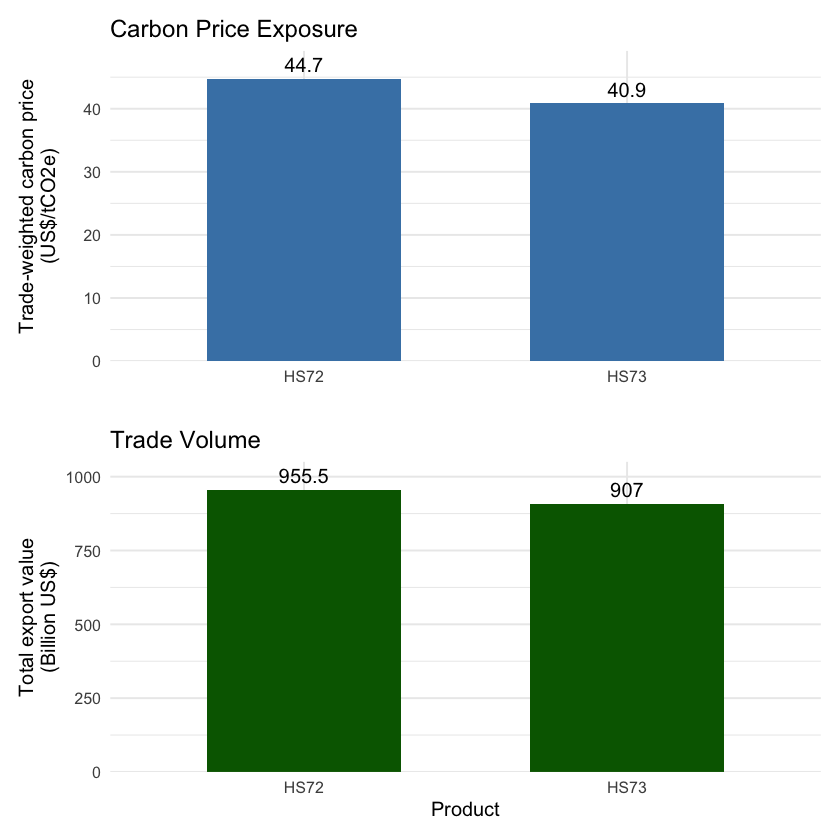

In [30]:
# Bar chat of carbon price exposure and trade volume 
library(ggplot2)

# Prepare data with both metrics(trade and HS code)
fig1_data <- product_analysis %>%
  mutate(
    Total_Trade_Billion = Mean_Trade * N / 1e6,  # Convert to billions for readability, total trade across observations 
    ProductLabel = paste0("HS", ProductCode)
  )

# Side-by-side comparison
library(patchwork)

p1 <- ggplot(fig1_data, aes(x = ProductLabel, y = Mean_Carbon_Price)) +
  geom_col(fill = "steelblue", width = 0.6) +
  #numerical value rounded to 1 decimal 
  geom_text(aes(label = round(Mean_Carbon_Price, 1)), vjust = -0.5) +
  #extend upper limit by 10% pf y axis 
  scale_y_continuous(expand = expansion(mult = c(0, 0.1)))+ 
  #set axis labels and title 
  labs(x = "", y = "Trade-weighted carbon price\n(US$/tCO2e)",
       title = "Carbon Price Exposure") +
  theme_minimal(base_size = 12)

p2 <- ggplot(fig1_data, aes(x = ProductLabel, y = Total_Trade_Billion)) +
  geom_col(fill = "darkgreen", width = 0.6) +
  geom_text(aes(label = round(Total_Trade_Billion, 1)), vjust = -0.5) +
  scale_y_continuous(expand = expansion(mult = c(0, 0.1)))+ 
  labs(x = "Product", y = "Total export value\n(Billion US$)",
       title = "Trade Volume") +
  theme_minimal(base_size = 12)

p1 / p2  # Stack vertically

`geom_smooth()` using formula = 'y ~ x'


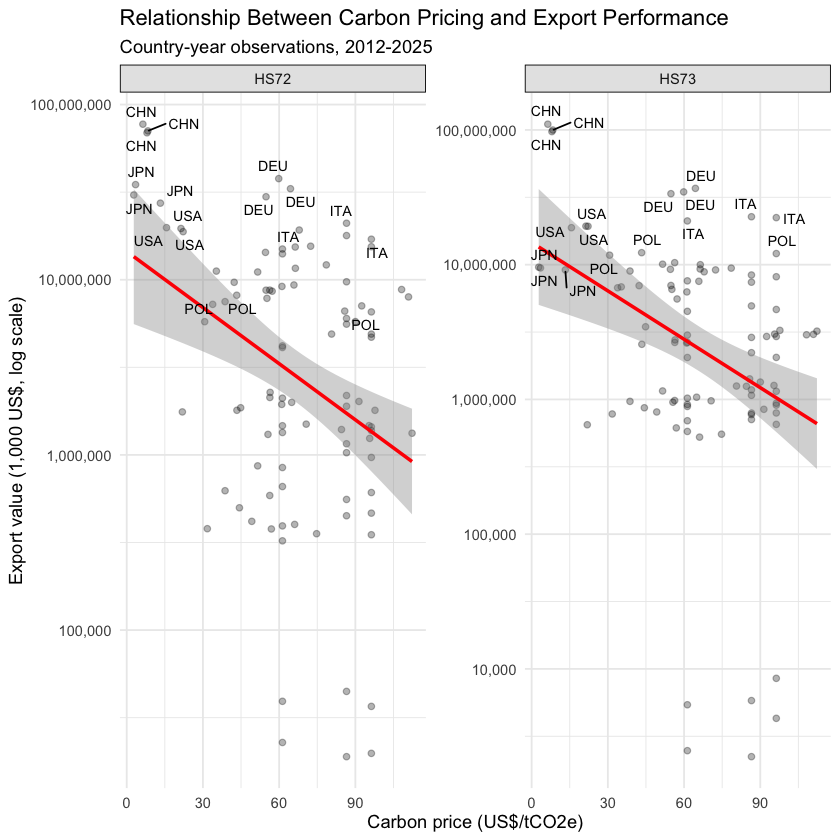

In [31]:
# Add country labels for top exporters
top_exporters <- final_data %>%
  group_by(ReporterISO3, ProductCode) %>%
  summarise(Total_Trade = sum(TradeValue_USD_1000, na.rm = TRUE), .groups = "drop") %>%
  group_by(ProductCode) %>%
  slice_max(Total_Trade, n = 5) %>%
  pull(ReporterISO3) %>%
  unique()

library(ggrepel)


ggplot(final_data %>% filter(!is.na(All_Price_Mean)),
       aes(x = All_Price_Mean, y = TradeValue_USD_1000)) +
  geom_point(alpha = 0.3, size = 1.5) +
  #adds regression line with standard error 
  geom_smooth(method = "lm", se = TRUE, color = "red", linewidth = 1) +
  # Label top exporters
  geom_text_repel(
    data = final_data %>% filter(ReporterISO3 %in% top_exporters),
    aes(label = ReporterISO3),
    size = 3, max.overlaps = 10
  ) +
  #log 10 scale because trade is skewed , each panel with its on y axis 
  scale_y_log10(labels = scales::comma) +
  facet_wrap(~ paste0("HS", ProductCode), scales = "free_y") +
  labs(
    x = "Carbon price (US$/tCO2e)",
    y = "Export value (1,000 US$, log scale)",
    title = "Relationship Between Carbon Pricing and Export Performance",
    subtitle = "Country-year observations, 2012-2025"
  ) +
  theme_minimal(base_size = 11) +
  theme(strip.background = element_rect(fill = "grey90"))

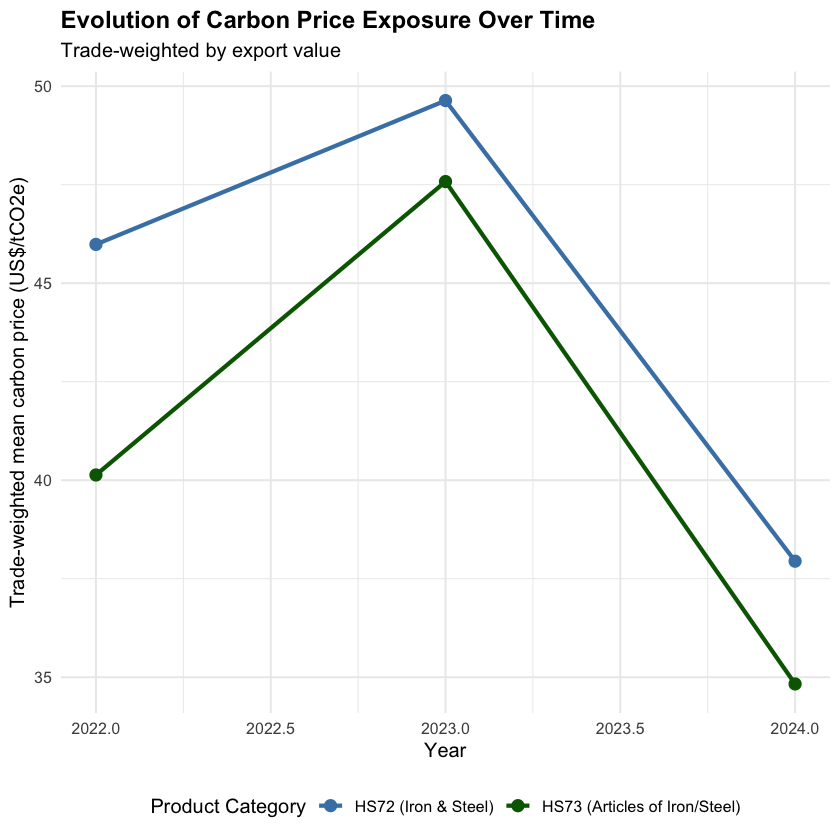

In [33]:
# Time Series Plot 
#Calculate trade-weighted carbon price by product and year
time_exposure <- final_data %>%
  group_by(Year, ProductCode) %>%
  summarise(
    Mean_Carbon_Price = weighted.mean(All_Price_Mean, 
                                      w = TradeValue_USD_1000, 
                                      na.rm = TRUE),
    Total_Trade = sum(TradeValue_USD_1000, na.rm = TRUE),
    .groups = "drop"
  )
# Create time series plot
ggplot(time_exposure,
       aes(x = Year, y = Mean_Carbon_Price, 
           color = factor(ProductCode), 
           group = ProductCode)) +
  geom_line(linewidth = 1.2) +
  geom_point(size = 3) +
  scale_color_manual(
    values = c("72" = "steelblue", "73" = "darkgreen"),
    labels = c("HS72 (Iron & Steel)", "HS73 (Articles of Iron/Steel)")
  ) +
  labs(
    x = "Year",
    y = "Trade-weighted mean carbon price (US$/tCO2e)",
    color = "Product Category",
    title = "Evolution of Carbon Price Exposure Over Time",
    subtitle = "Trade-weighted by export value"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    legend.position = "bottom",
    plot.title = element_text(face = "bold")
  )

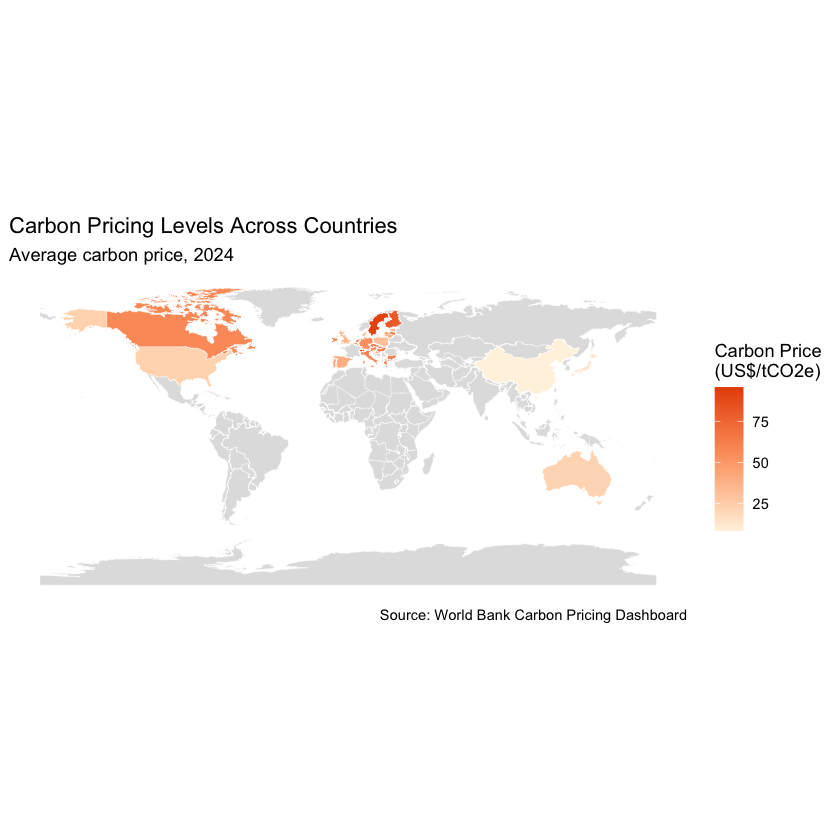

In [35]:
# Get world map data
world <- ne_countries(scale = "medium", returnclass = "sf")

# Prepare your carbon pricing data
carbon_map_data <- final_data %>%
  filter(Year == 2024) %>%  # Use most recent year
  group_by(ReporterISO3) %>%
  summarise(
    Has_Carbon_Price = !is.na(first(All_Price_Mean)),
    Mean_Price = mean(All_Price_Mean, na.rm = TRUE),
    Price_Type = first(Carbon_Price_Type)
  )

# Merge with world map
world_carbon <- world %>%
  left_join(carbon_map_data, by = c("iso_a3" = "ReporterISO3"))

# Map with carbon price intensity
ggplot(world_carbon) +
  geom_sf(aes(fill = Mean_Price), color = "white", size = 0.1) +
  scale_fill_gradient(
    low = "#FFF3E0", 
    high = "#E65100",
    na.value = "#E0E0E0",
    name = "Carbon Price\n(US$/tCO2e)",
    breaks = c(0, 25, 50, 75, 100)
  ) +
  labs(
    title = "Carbon Pricing Levels Across Countries",
    subtitle = "Average carbon price, 2024",
    caption = "Source: World Bank Carbon Pricing Dashboard"
  ) +
  theme_minimal() +
  theme(
    legend.position = "right",
    panel.grid = element_blank(),
    axis.text = element_blank(),
    axis.ticks = element_blank()
  )

## Regression Model 

In [38]:
library(fixest)
library(modelsummary)
library(dplyr)
library(pandoc)

In [39]:
## Regression Model 
#Run regressions

# Model 1: Pooled effect (average across both products)
model1 <- feols(
  log(TradeValue_USD_1000 + 1) ~ All_Price_Mean,
  data = final_data,
  vcov = "hetero"
)

# Model 2: Add country fixed effects
model2 <- feols(
  log(TradeValue_USD_1000 + 1) ~ All_Price_Mean | ReporterISO3,
  data = final_data,
  cluster = ~ ReporterISO3
)

# Model 3: Add country + year fixed effects
model3 <- feols(
  log(TradeValue_USD_1000 + 1) ~ All_Price_Mean | 
    ReporterISO3 + Year,
  data = final_data,
  cluster = ~ ReporterISO3
)

# Model 4: MAIN MODEL - Allow different effects by product
model4 <- feols(
  log(TradeValue_USD_1000 + 1) ~ All_Price_Mean * factor(ProductCode) |
    ReporterISO3 + Year,
  data = final_data,
  cluster = ~ ReporterISO3
)

# Create table
modelsummary(
  list(
    "Pooled" = model1,
    "+ Country FE" = model2,
    "+ Year FE" = model3,
    "Product Interaction" = model4
  ),
  output = "regression_table.csv",
  stars = TRUE,
  coef_rename = c(
    "All_Price_Mean" = "Carbon Price",
    "factor(ProductCode)73" = "HS73 (dummy)",
    "All_Price_Mean:factor(ProductCode)73" = "Carbon Price × HS73"
  ),
  gof_map = c("nobs", "r.squared", "adj.r.squared"),
  title = "Effect of Carbon Pricing on Energy-Intensive Steel Exports",
  notes = "Dependent variable: log(Export Value). Standard errors clustered by country."
)


NOTE: 16 observations removed because of NA values (RHS: 16).

NOTE: 16 observations removed because of NA values (RHS: 16).

NOTE: 16 observations removed because of NA values (RHS: 16).

NOTE: 16 observations removed because of NA values (RHS: 16).

